# AS5001 (SUPA-AAA) Advanced (Astronomical) Data Analysis

## Project 2: Deadline 5 pm Wed 23 Nov 2022

## Hunting a Black Hole in GS2000

In the close binary system GS2000, a late-type main-sequence star
orbits around a compact object surrounded by an accretion disk.
GS2000 is a "soft X-ray transient" discovered during an outburst
of the disk when it became a bright X-ray source due to temporarily
increased rate of accretion onto the compact object.
The compact object is suspected to be a black hole,
but it could also be a neutron star.  Theory suggests that
the maximum mass possible for a neutron star is about 3 solar masses.

The goal of this project is to use data analysis techniques learned
in the lectures to estimate the mass of the compact object
in GS2000, and hence to determine if it is likely to be a black hole.
To measure the compact object mass, the strategy is to measure
the period and orbital velocity of the companion star,
and then apply Kepler's law.

The 10-m Keck telescope on Mauna Kea in Hawaii has been used to
obtain 13 spectra of GS2000 at 13 different binary phases.
The spectra include light both from the companion star and from
the accretion disk.  They were taken a few years after the outburst,
when accretion disk had faded considerably, so that the companion star
makes a substantial contribution to the spectrum.

Because GS2000 is quite faint, spectra are rather noisy
even with the CCD spectrograph on the 10m Keck telescope.
The H$\alpha$ emission line from the quiescent accretion disk is readily
visible, with a characteristic double-peaked velocity profile.
But it is not easy to spot absorption lines from the companion star
in the individual spectra.
For this reason a cross-correlation analysis is needed to detect
the radial velocity of the companion star at each of the 13 phases.
A number of bright main sequence stars were observed to provide
"template" spectra, in which the locations of absorption lines
are easily visible.

The techniques required have been developed in the lectures and homework sets.
Steps of the cross-correlation radial velocity analysis may be as follows:


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import os
import glob

1: Plot on a single page the template star spectra, arranged by spectral
type, and normalised to a common continuum level, to show how absorption line
ratios change with spectral type. [5]

In [6]:
data = Table.read("keck/keck_gs2000_01.dat", format="ascii")

In [7]:
data

col1,col2,col3
float64,float64,float64
5638.4887211103,0.00822606,0.00234901
5639.1205159773,0.00274758,0.00226163
5639.7523407744,0.00267249,0.00232868
5640.3841954708,0.00563077,0.00233517
5641.0160800359,0.0102666,0.00232829
5641.6479944389,0.011274,0.0023034
5642.2799386492,0.00349383,0.00221763
5642.911912636,0.00918641,0.00230307
5643.5439163686,0.00672816,0.00226501


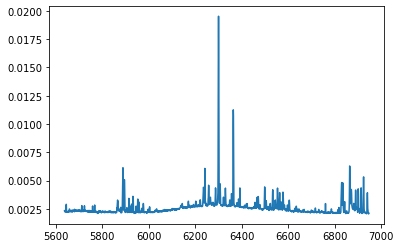

In [11]:
plt.plot(data['col1'], data['col3'])

In [ ]:
plt.plot()

2: Plot on a single page, ordered by binary phase, the 13 spectra of GS2000,
to show the shape of the continuum and the changing profile of the H-alpha
emission line. [5]

3: Plot the average of the 13 spectra of GS2000.
Are any of the expected absorption lines detected?
What range of spectral types provides a good match? [5]

4: Fit a smooth function to the continuum of each of the spectra.
Plot the average GS2000 spectrum divided by the fitted continuum,
and do the same for the most suitable template spectrum. [10]

5: For each of the 13 spectra, measure the radial velocity by
performing a cross-correlation analysis with the most suitable
template spectrum. [25]

To accomplish this:
    
(a) Subtract the continuum from the GS2000 spectrum,
and from the template spectra.
    
(b) Apply a velocity shift to the continuum-subtracted
template spectrum.

(c) Scale the shifted and continuum-subtracted template
spectrum to fit the continuum-subtracted GS2000 spectrum.
    
(d) Repeat the above for a number of different velocities,
and plot the $\chi^2$ of the fit as a function of 
the velocity shift.
        
(e) Use the $\chi^2$ minimum to estimate the radial velocity
and its 1-sigma uncertainty.
    

6: Plot the measured velocities and 1-sigma uncertainties
as a function of binary phase. Put these results also 
in a table in your report. [5]

7: Fit a sinusoidal velocity curve of the form
$$
V(\phi) = \gamma + K_x  \sin{( 2\,\pi\,\phi)} + K_y 
\cos{(2\,\pi\,\phi)}
$$
to the 13 velocity measurements. Show the best fit velocity curve
on your plot with the data points and error bars. [5]

8: From your results, estimate the radial velocity semi-amplitude,
$	K = \left( {K_x}^2 + {K_y}^2 \right)^{1/2} $
	and its 1-$\sigma$ uncertainty.
	This is the orbit velocity of the companion star,
	projected by a factor $\sin{\left(i\right)}$ due to the inclination of 
the orbit. Describe your algorithm clearly and without unambiguity. [10]

9: Give two expressions for the compact object mass function $f(M_x)$,
the first in terms of the observable quantities $P$ and $K$,
and the second in terms of the compact object mass $M_x$,
the inclination $i$, and the mass ratio $q=M_c/M_x$, where $M_c$ is
the companion star mass.
From the binary period $P$ and your measured $K$ velocity,
estimate $f(M_x)$ in solar units.
Give also the 1-sigma uncertainty. [5]

10: Adopt a specific inclination $i=90^\circ$,
and a specific $M_c=0.5~M_\odot$.
For these choices, calculate the compact
object mass $M_x$. Give the 1-$\sigma$ uncertainty, assuming that 
$i$ and $M_c$ are known exactly.
Be clear about your algorithm for estimating the uncertainties,
and collect your results in a table in your report. [5]

11: In fact $i$ and $M_c$ are not known, but have some limited range.
What range of $i$ and $M_c$ would be appropriate, given what
you know about the spectral type of the donor star, and
considering that no eclipses occur?
Use Monte-Carlo error propogation to sample the range of uncertainty
in $i$, $M_c$, $K$, and $P$.  Be careful to assume a distribution 
for $i$ that corresponds to a random orbit orientation.
For each Monte-Carlo trial, calculate
the corresponding $M_x$.  Make plots showing the resulting
probability distribution for $M_x$, both as a probability density
histogram, and as a cumulative probability function.
Draw vertical lines on the plots to indicate
the mean and median of the $M_x$ distribution,
and a 1-sigma confidence interval for $M_x$.
As always, be clear in describing your algorithms.
Collect your results in a table in your report. [15]

12: Give the probability that the compact object mass is higher
than 3 solar masses, and hence the probability that it
is a black hole rather than a neutron star. [5]